## Overview

This project aims to apply machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The objectives are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run experiment and to report and interpret your results clearly and concisely.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 1. Loading and initial processing of the dataset 

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
### Your code here
df = pd.read_csv("SeoulBikeData.csv")

In [3]:
print(df.shape)
print(df.columns)

(8760, 14)
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


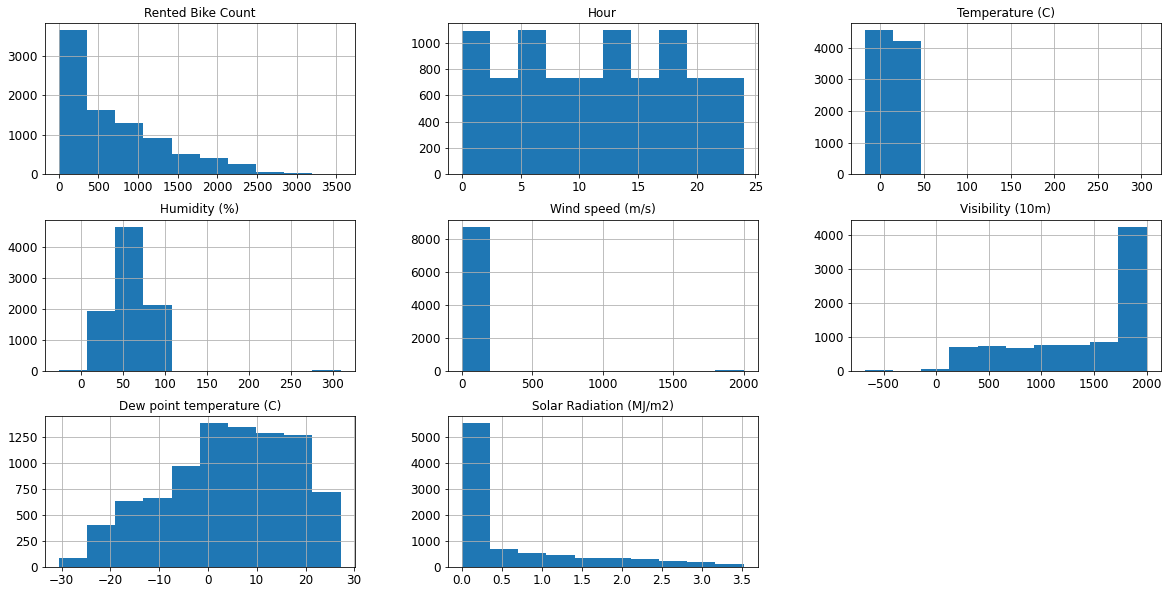

In [6]:
df.hist(figsize=(20,10))
plt.show()

###  Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this project, we are only interested in predicting demand on days when the business is open, so the remove rows from the DataFrame where the business is closed.

In [7]:
### Your code here
# remove rows from the DataFrame where the business is closed           
df = df.loc[df['Functioning Day'] == 'Yes']
df=df.drop('Functioning Day',axis=1)
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday


In [8]:
### convert Holiday columns into numeric
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df.head(5)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


In [9]:
### convert each season into new column 
df['Spring'] = df['Seasons'].map({'Spring': 1, 'Summer': 0, 'Autumn': 0, 'Winter': 0})
df['Summer'] = df['Seasons'].map({'Spring': 0, 'Summer': 1, 'Autumn': 0, 'Winter': 0})
df['Autumn'] = df['Seasons'].map({'Spring': 0, 'Summer': 0, 'Autumn': 1, 'Winter': 0})
df['Winter'] = df['Seasons'].map({'Spring': 0, 'Summer': 0, 'Autumn': 0, 'Winter': 1})
df = df.drop("Seasons", axis = 1)

It is known that bike rentals depend strongly on whether it's a weekday or a weekend. Therefore, replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.


In [10]:
# A function that returns 1 if it is a weekday and 0 if it is a weekend
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
df["Date"]=df["Date"].apply(date_is_weekday)
df.rename(columns={'Date': 'Weekday'}, inplace=True)

In [11]:
# convert the rainfall and snowfall into numeric
def convert_to_numeric(x):
    try:
        string_num=float(x)
        return string_num
    except:
        return np.nan
        
df['Rainfall(mm)'] = df['Rainfall(mm)'].map(convert_to_numeric)
df['Snowfall (cm)'] =df['Snowfall (cm)'].map(convert_to_numeric)

## 2. Visualise the data and perform further processing 
### 2.1 Visualisation
After manipulate the data, visualise the dataset and also the distribution


In [12]:
df.head()

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Autumn,Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1


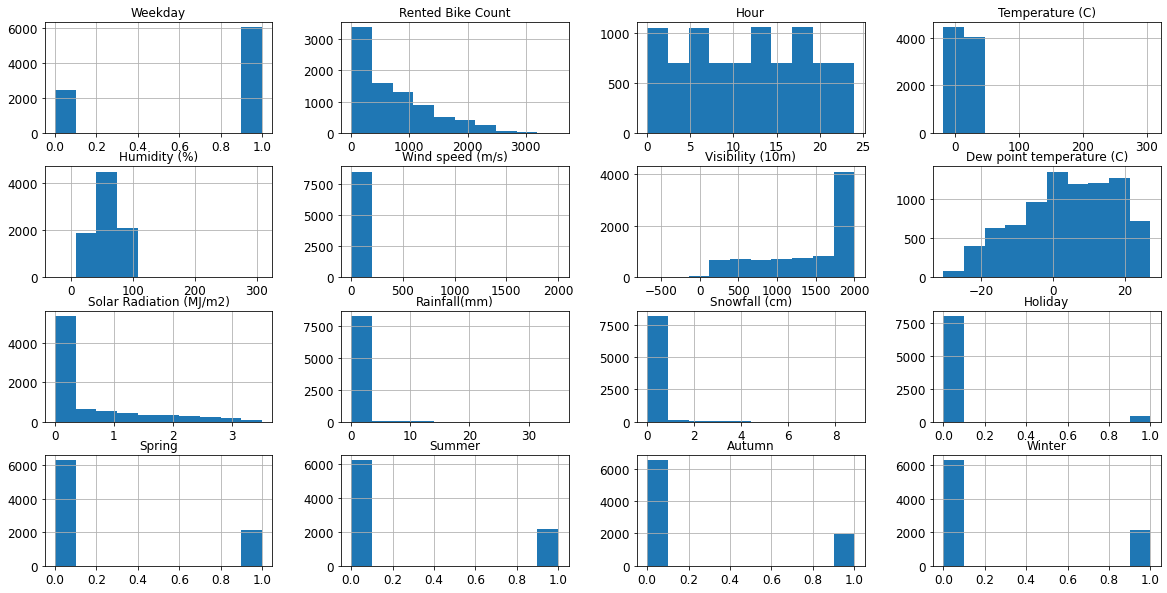

In [13]:
### Histogram
df.hist(figsize=(20,10))
plt.show()

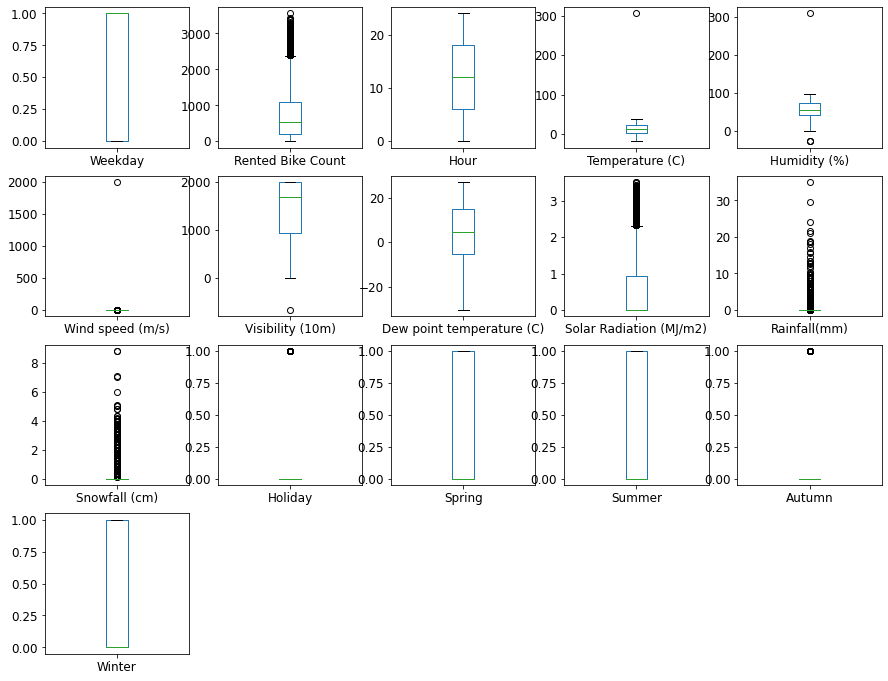

In [14]:
# Boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))
plt.show()

### Summary of problemetic entries
From the above boxplots, we can see that "Solar Radiation", "Rainfall" and "Snowfall" have a lot of outliers. For Temperature, Humidity, wind speed and visibility, there are few outliers. 

Also, for the “Spring”, “Summer”, “Autumn”, “Winter” and “Holiday”, since we have converted into 0s and 1s, we can observe the outliers in the histograms. In the histograms, we can see there are not outliers, which means there are no other values except 0s and 1s, therefore, we can conclude that there are no problematic entries in these variables. 

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used.

In [15]:
# In this step, I am going to apply the 1.5x IQR rule to identify to outliers.
# By using this method, we define a new range as a decision range to detect the outliers.

In [16]:
temp_df = df.copy()

# Q1 – 1.5xIQR = lower_bound
# Q3 + 1.5xIQR = upper_bound
# IQR=Q3-Q1

temp_q1 = temp_df.quantile([0.25,0.75])
iqr= temp_q1.iloc[1]-temp_q1.iloc[0]
temp_q1=temp_q1.append(iqr,ignore_index=True)
#lower_bound 
lower_bound=temp_q1.iloc[0]-(temp_q1.iloc[2].multiply(other = 1.5))
temp_q1=temp_q1.append(lower_bound,ignore_index=True)

#Upper
upper_bound=temp_q1.iloc[1]+(temp_q1.iloc[2].multiply(other = 1.5))
temp_q1=temp_q1.append(upper_bound,ignore_index=True)
index_ = ['Q1', 'Q3', 'IQR', 'Lower_bound', 'Upper_bound']
  
# set the index
temp_q1.index = index_
temp_q1

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Autumn,Winter
Q1,0.0,214.0,6.0,3.00,42.0,0.9,935.0,-5.10,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q3,1.0,1084.0,18.0,22.70,74.0,2.3,2000.0,15.20,0.930,0.0,0.0,0.0,1.0,1.0,0.0,1.0
IQR,1.0,870.0,12.0,19.70,32.0,1.4,1065.0,20.30,0.930,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Lower_bound,-1.5,-1091.0,-12.0,-26.55,-6.0,-1.2,-662.5,-35.55,-1.395,0.0,0.0,0.0,-1.5,-1.5,0.0,-1.5
Upper_bound,2.5,2389.0,36.0,52.25,122.0,4.4,3597.5,45.65,2.325,0.0,0.0,0.0,2.5,2.5,0.0,2.5


In [17]:
# I create a temperorary dataframe to show the Inter-Quartile Range, and also the lower and upper bound. 
# The lower and upper bound are the "cut-off" of the dataset. 
# For any values that below the lower bound and above the upper bound, they will be converted into nan.

In [18]:
# # values that below the lower bound and upper bound, would be set as nan
for col_name in df:
    lb = temp_q1[col_name].iloc[3]
    ub = temp_q1[col_name].iloc[4]
    iqr = temp_q1[col_name].iloc[2]
    

    if (not col_name == 'Rented Bike Count') and (not iqr == 0):
        for i, each in enumerate(df[col_name]):
            if each < lb or each > ub:
                df[col_name].iloc[i] = np.nan
                

C:\Users\bensu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
### Bulid a base pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
pre_processing = Pipeline([("imputer" , SimpleImputer(strategy = "median")), ("RobustScaler",RobustScaler())])

### 2.3 Correlation 

Find how strongly correlated the features are to the desired target (Rented Bike Count).  

Display a scatter plot for each feature (separately) vs the target variable to visualise the strength of the relationships.  Also calculate the correlation of each feature with the target and find the top attributes are the most correlated with bike rentals

In [20]:
# fit and apply the pipeline 
pre_processing.fit_transform(df)

array([[ 0.        , -0.33103448, -1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.38850575, -0.91666667, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.42413793, -0.83333333, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.17471264,  0.75      , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.1954023 ,  0.83333333, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.04827586,  0.91666667, ...,  0.        ,
         1.        ,  0.        ]])

In [21]:
# Show the all the correlation and than find the 3 top most related r
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
correlation=[]
for i in df:
    if i == "Rented Bike Count":
        pass
    else:
        correlation.append([df["Rented Bike Count"].corr(df[i],method = histogram_intersection),i])

correlation.sort(reverse=True)
correlation[:3]

[[5454082.0, 'Visibility (10m)'],
 [466448.0, 'Humidity (%)'],
 [107774.5, 'Temperature (C)']]

The 3 most correlated attributes with bike rentals are: 
'Temperature (C)': 0.5627742620278251
'Hour': 0.4254596238709941
 'Dew point temperature (C)': 0.4002482886104627

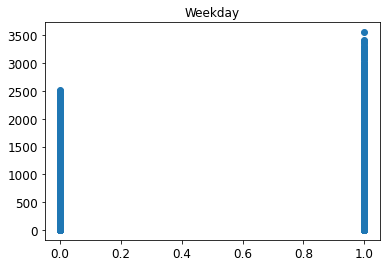

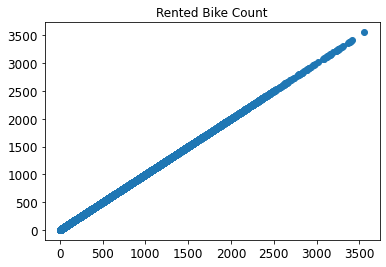

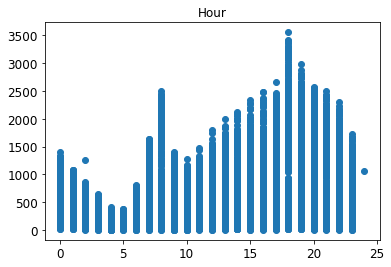

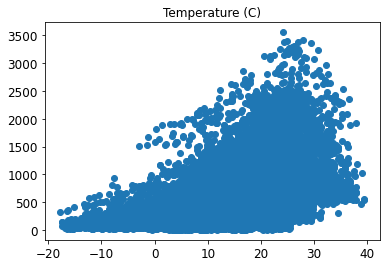

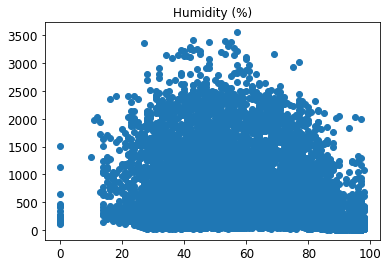

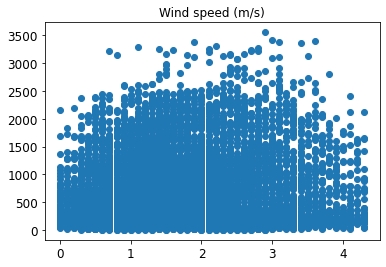

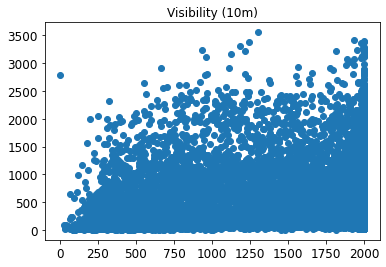

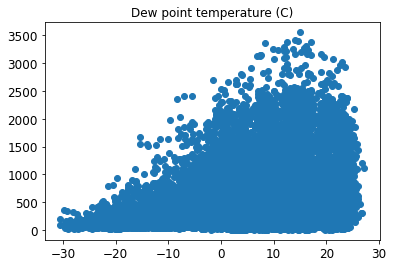

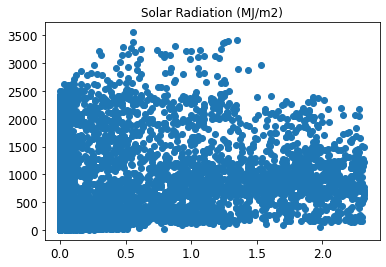

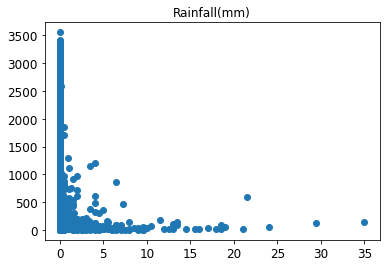

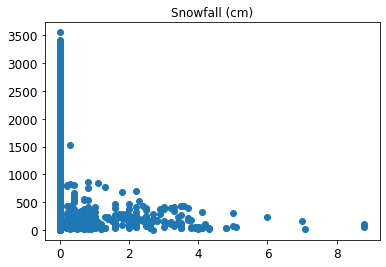

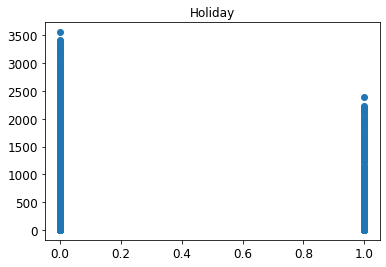

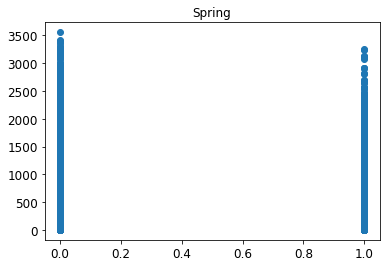

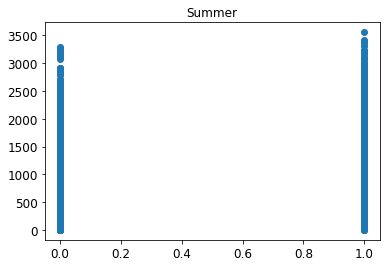

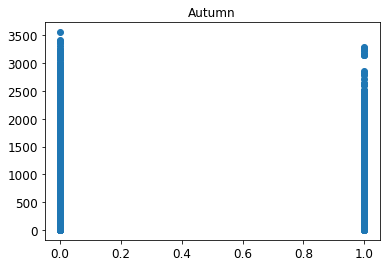

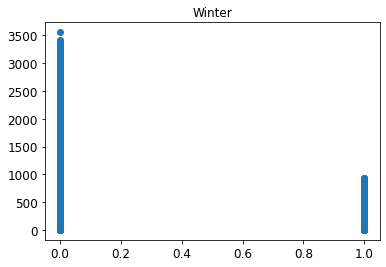

In [22]:
### Your code here
## display a scatter plot for each feature
import matplotlib.pyplot as plt
list_feature = df.columns

for i in list_feature:
    plt.scatter(df[i],df['Rented Bike Count'])
    plt.title(str(i))
    # add the y here
    plt.show()
    

## 3. Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. The root mean squared error (rmse) metric will be used to quantify performance.  

- **Split the data** into 80% of training set and 20% of the  test set. 
- **Build a pipeline** base one the previous one and now include a ***linear regression* model**. 
- **Fit** this to your training data for a quick test. 
- **calculate the rmse of the fit to the training data** to get an idea of how successful this model
- To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [23]:
#split the data 80/20
from sklearn.model_selection import train_test_split

train , test = train_test_split(df, train_size=0.8, random_state=42)
X_train = train.drop(['Rented Bike Count'],axis=1)
y_train = train['Rented Bike Count']

X_test = test.drop(['Rented Bike Count'],axis=1)
y_test = test['Rented Bike Count']

print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(6772, 15) (1693, 15) (6772,) (1693,)


### Build different models for comparison
- linear regression model
- Kernel Ridge regression
- Support Vector Regression

In [24]:
#Build a pipeline from the previous one and include a linear regression model
from sklearn.linear_model import LinearRegression
linear_pipeline = Pipeline([("Pre_processing",pre_processing), ("linear_regression",LinearRegression())])

In [25]:
# fit the model by using the X_train, y_train
from sklearn.metrics import mean_squared_error
linear_model=linear_pipeline.fit(X_train, y_train)

#calculate the rmse of the fit to the training data                     
linear_predicted_labels = linear_model.predict(X_train)
linear_rmse = np.sqrt(mean_squared_error(y_train, linear_predicted_labels))
print("By using linear regression model, the Root Mean Squared Error of the training data is :", linear_rmse)

By using linear regression model, the Root Mean Squared Error of the training data is : 439.6217135749095


In [26]:
#baseline
#create the mean labels training labels series
training_labels_mean=y_train.mean()
empty=[]
# we use len(test_label) to match the number
for i in range(len(y_train)):
    empty.append(training_labels_mean)

series_mean = pd.Series(np.array(empty))

baseline_rmse = np.sqrt(mean_squared_error(y_train,series_mean))
print("The Baseline Root Mean Squared Error : ", baseline_rmse)


The Baseline Root Mean Squared Error :  646.170499547999


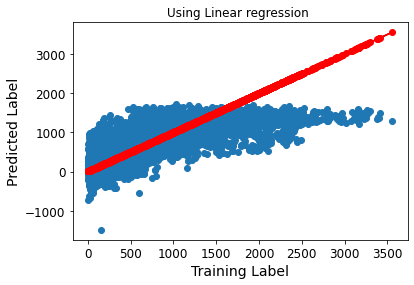

In [27]:
plt.title("Using Linear regression ")
plt.xlabel("Training Label")
plt.ylabel("Predicted Label")
plt.scatter(y_train,linear_predicted_labels)
plt.plot(y_train,y_train,'r-o')

The second model to fit is ***Kernel Ridge*** regression. Build a pipeline using this and fit it to your training data  and plot the fit and display the rmse for the training dataset.

In [28]:
### Your code here
from sklearn.kernel_ridge import KernelRidge
#building the pipeline
ridge_pipeline = Pipeline([("Pre_processing",pre_processing),("KernelRidge",KernelRidge())])
# fitting
ridge_model = ridge_pipeline.fit(X_train, y_train)

#find the ridge_rmse
ridge_predicted_labels = ridge_model.predict(X_train)
ridge_rmse = np.sqrt(mean_squared_error(y_train, ridge_predicted_labels))
print("By using Kernel Ridge regression, the RMSE of the training dataset is ", ridge_rmse)

By using Kernel Ridge regression, the RMSE of the training dataset is  439.62385520761524


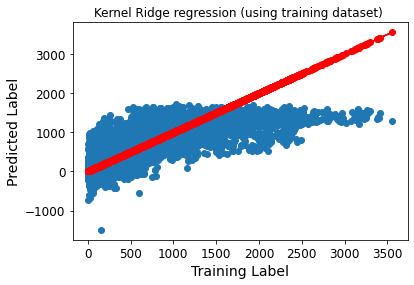

In [29]:
plt.title("Kernel Ridge regression (using training dataset) ")
plt.xlabel("Training Label")
plt.ylabel("Predicted Label")
plt.scatter(y_train,ridge_predicted_labels)
plt.plot(y_train,y_train,'r-o')

The third  model, is **Support Vector Regression**. Again, **Build a pipeline using this and fit it to your training data**and plot the fit and display the rmse for the training dataset.

In [30]:
### Your code here
from sklearn.svm import SVR
SVR_pipeline = Pipeline([("Pre_processing",pre_processing),("SVR",SVR())])
# fitting
SVR_model = SVR_pipeline.fit(X_train, y_train)

#find the ridge_rmse
SVR_predicted_labels = SVR_model.predict(X_train)
SVR_rmse = np.sqrt(mean_squared_error(y_train, SVR_predicted_labels))
print("By using Support Vector Regression, the RMSE of the training dataset is ", SVR_rmse)

By using Support Vector Regression, the RMSE of the training dataset is  528.7916618104954


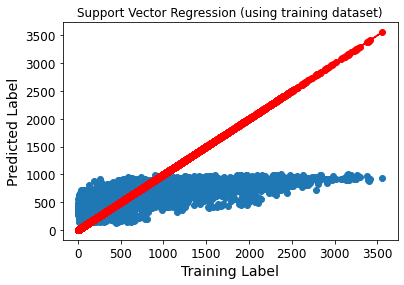

In [31]:
plt.title("Support Vector Regression (using training dataset)")
plt.xlabel("Training Label")
plt.ylabel("Predicted Label")
plt.scatter(y_train,SVR_predicted_labels)
plt.plot(y_train,y_train,'r-o')

## 4. Cross validation

**Perform a *10 fold cross validation* for each model.** 

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** . **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [32]:
from sklearn.model_selection import cross_validate
linear_cross_scores = cross_validate(linear_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
linear_training_scores = abs(linear_cross_scores["train_score"])
linear_validation_scores = abs(linear_cross_scores["test_score"])

linear_training_scores = np.sqrt(linear_training_scores)
linear_validation_scores = np.sqrt(linear_validation_scores)

print("By using linear regression model ")

print("The mean of the rmse values for the training data splits :", np.mean(linear_training_scores))
print("The mean of the rmse values for the validation splits :", np.mean(linear_validation_scores))

print("Standard deviation of the rmse values for the training data splits :", np.std(linear_training_scores))
print("Standard deviation of the rmse values for the validation splits: ", np.std(linear_validation_scores))

By using linear regression model 
The mean of the rmse values for the training data splits : 439.54787875890713
The mean of the rmse values for the validation splits : 440.7649137992151
Standard deviation of the rmse values for the training data splits : 1.6620658360437859
Standard deviation of the rmse values for the validation splits:  14.908193030198774


In [33]:
### 10 fold cross validation for kernel ridge
ridge_scores = cross_validate(ridge_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
ridge_training_scores = np.sqrt(abs(ridge_scores["train_score"]))
ridge_validation_scores = np.sqrt(abs(ridge_scores["test_score"]))

print("By using Kernel Ridge regression model for the validation splits ")
print("The mean of the rmse values for the training data splits : ", np.mean(ridge_training_scores))
print("The mean of the rmse values for the validation splits: ", np.mean(ridge_validation_scores))
print("standard deviation of the rmse values for the training data splits : ", np.std(ridge_training_scores))
print("standard deviation of the rmse values for the validation splits: ", np.std(ridge_validation_scores))

By using Kernel Ridge regression model for the validation splits 
The mean of the rmse values for the training data splits :  439.55048556262335
The mean of the rmse values for the validation splits:  440.75507788610577
standard deviation of the rmse values for the training data splits :  1.6616327130771746
standard deviation of the rmse values for the validation splits:  14.859884036194387


In [34]:
### 10 fold cross validation for SVR
SVR_scores = cross_validate(SVR_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
SVR_training_scores = abs(SVR_scores["train_score"])
SVR_validation_scores = abs(SVR_scores["test_score"])

SVR_training_scores = np.sqrt(SVR_training_scores)
SVR_validation_scores = np.sqrt(SVR_validation_scores)


print("By using Support Vector Regression model")
print("The mean of the rmse values training data splits: ", np.mean(SVR_training_scores))
print("The mean of the rmse values for the validation splits: ", np.mean(SVR_validation_scores))
print("standard deviation of the rmse values for training data splits: ", np.std(SVR_training_scores))
print("standard deviation of the rmse values for the validation splits:: ", np.std(SVR_validation_scores))

By using Support Vector Regression model
The mean of the rmse values training data splits:  538.2681571917908
The mean of the rmse values for the validation splits:  538.2054552619375
standard deviation of the rmse values for training data splits:  2.1228730360526336
standard deviation of the rmse values for the validation splits::  20.410734120853128


## Find the best model
From the above calculation we found that: 

The baseline RMSE's Root Mean Squared Error is 646.170499547999. 

**For the training error:**    
By using ***linear regression model***, the RMSE of the training data is : 439.6217135749095   
By using ***Kernel Ridge regression***, the RMSE of the training dataset is  439.62385520761524   
By using ***Support Vector Regression***, the RMSE of the training dataset is  528.7916618104954   

**In cross validation error:**    
By using ***linear regression model***,the mean of the RMSE values is:  440.7649137992151    
By using ***Kernel Ridge regression model***, the mean RMSE is 440.75507788610577      
By using ***Support Vector Regression model***, the mean RMSE values is:  538.2054552619375   

As we know, if the RMSE for the training set is much lower than validation set, it is likely that the model is overfitted. If the RMSE for the training set is much higher than validation set, it is likely that the model is underfitted. 

In our case, we created a baseline as a reference for comparing the performance of different models. According to the results, all 3 model of training errors are lower than baseline RMSE, which indicated that no models are underfitted.

For the training error and validation error, by comparing each of them respectively, there are no significant difference, therefore, we can conclude that non of the models are overfitted.

Also, in cross validation error, the Kernel Ridge regression model has the lowest RMSE ,which shows this model perform the best. Therefore, I think **Kernel Ridge regression** is the best model out of these three.


## Grid parameter search


In [39]:
#find the keys from the keys
SVR_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Pre_processing', 'SVR', 'Pre_processing__memory', 'Pre_processing__steps', 'Pre_processing__verbose', 'Pre_processing__imputer', 'Pre_processing__RobustScaler', 'Pre_processing__imputer__add_indicator', 'Pre_processing__imputer__copy', 'Pre_processing__imputer__fill_value', 'Pre_processing__imputer__missing_values', 'Pre_processing__imputer__strategy', 'Pre_processing__imputer__verbose', 'Pre_processing__RobustScaler__copy', 'Pre_processing__RobustScaler__quantile_range', 'Pre_processing__RobustScaler__unit_variance', 'Pre_processing__RobustScaler__with_centering', 'Pre_processing__RobustScaler__with_scaling', 'SVR__C', 'SVR__cache_size', 'SVR__coef0', 'SVR__degree', 'SVR__epsilon', 'SVR__gamma', 'SVR__kernel', 'SVR__max_iter', 'SVR__shrinking', 'SVR__tol', 'SVR__verbose'])

In [40]:
from sklearn.model_selection import GridSearchCV

c_values = np.arange(1,10,0.5)
gridcv_SVC = GridSearchCV(ridge_model, {'KernelRidge__alpha': c_values}, cv=10)
gridcv_SVC.fit(X_train, y_train)
print(f' best params of {gridcv_SVC.best_params_}')

 best params of {'KernelRidge__alpha': 2.5}


In [41]:
ridge_pipeline_test = Pipeline([("Pre_processing",pre_processing),("KernelRidge",KernelRidge(alpha=2.5))])
# fitting
ridge_model_test = ridge_pipeline_test.fit(X_train, y_train)

#find the ridge_rmse
real_predicted_labels = ridge_model_test.predict(X_test)

# choose the best param and model and do the real test do the predict

final_rmse = np.sqrt(mean_squared_error(y_test, real_predicted_labels))
final_rmse

419.95750461380874